# Data Incubator Project - Making the <i>'TEDTalks<i> Talk !'

I have been watching TEDTalks since I was in Junior College. I was fasinated with it's concept and was very inspired by the talks given by so many known-unknown personalities. This whole process made a really great impact on my personality and the way I have grown till the date.

I am currently pursuing my masters in Business Analytics and Information systems from University of South Florida, Tampa, Florida - US. With fair background in Data analytics, I recently took a course on 'Text Analytics' . This course drove a great interest in me towards natural language processing.

When I got to know there is a data set available for TEDTalks and with my current affection towards NLP, I decided in split seconds to work on this data set to drive some valuable insights so as I can keep up with my favourite things ! NLP and TEDTalks!

Below I have done some basic EDA for the TEDTalk data.

In [9]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r"F:\Data Incubator\TEDonly_final.csv")

In [11]:
df.shape

(992, 16)

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,speaker_1,speaker_2,speaker_3,speaker_4
0,0,0,1,https://www.ted.com/talks/al_gore_on_averting_...,Averting the climate crisis,With the same humor and humanity he exuded in ...,TED2006,0:16:17,6/27/06,"alternative energy,cars,global issues,climate ...",3266733,"Thank you so much, Chris. And it's truly a g...",Al Gore,NaN,NaN,NaN
1,1,1,7,https://www.ted.com/talks/david_pogue_says_sim...,Simplicity sells,New York Times columnist David Pogue takes aim...,TED2006,0:21:26,6/27/06,"simplicity,entertainment,interface design,soft...",1702201,"(Music: ""The Sound of Silence,"" Simon & Garf...",David Pogue,NaN,NaN,NaN
2,2,2,53,https://www.ted.com/talks/majora_carter_s_tale...,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",TED2006,0:18:36,6/27/06,"MacArthur grant,cities,green,activism,politics...",2000421,If you're here today — and I'm very happy th...,Majora Carter,NaN,NaN,NaN
3,3,3,66,https://www.ted.com/talks/ken_robinson_says_sc...,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,TED2006,0:19:24,6/27/06,"children,teaching,creativity,parenting,culture...",51614087,Good morning. How are you? (Laughter) ...,Ken Robinson,NaN,NaN,NaN
4,4,4,92,https://www.ted.com/talks/hans_rosling_shows_t...,The best stats you've ever seen,You've never seen data presented like this. Wi...,TED2006,0:19:50,6/27/06,"demo,Asia,global issues,visualizations,global ...",12662135,"About 10 years ago, I took on the task to te...",Hans Rosling,NaN,NaN,NaN


### Date Time Conversion

In [13]:
df['published'] = pd.to_datetime(df['published'], infer_datetime_format= True)
df['duration'] = [datetime.datetime.strptime(d, "%H:%M:%S") for d in df["duration"]]
df['duration'] = [datetime.datetime.time(d) for d in df['duration']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 16 columns):
Unnamed: 0      992 non-null int64
Unnamed: 0.1    992 non-null int64
Talk_ID         992 non-null int64
public_url      992 non-null object
headline        992 non-null object
description     992 non-null object
event           992 non-null object
duration        992 non-null object
published       992 non-null datetime64[ns]
tags            992 non-null object
views           992 non-null int64
text            992 non-null object
speaker_1       992 non-null object
speaker_2       26 non-null object
speaker_3       1 non-null object
speaker_4       1 non-null object
dtypes: datetime64[ns](1), int64(4), object(11)
memory usage: 124.1+ KB


### Distibution of Duration of 992 Ted Talks

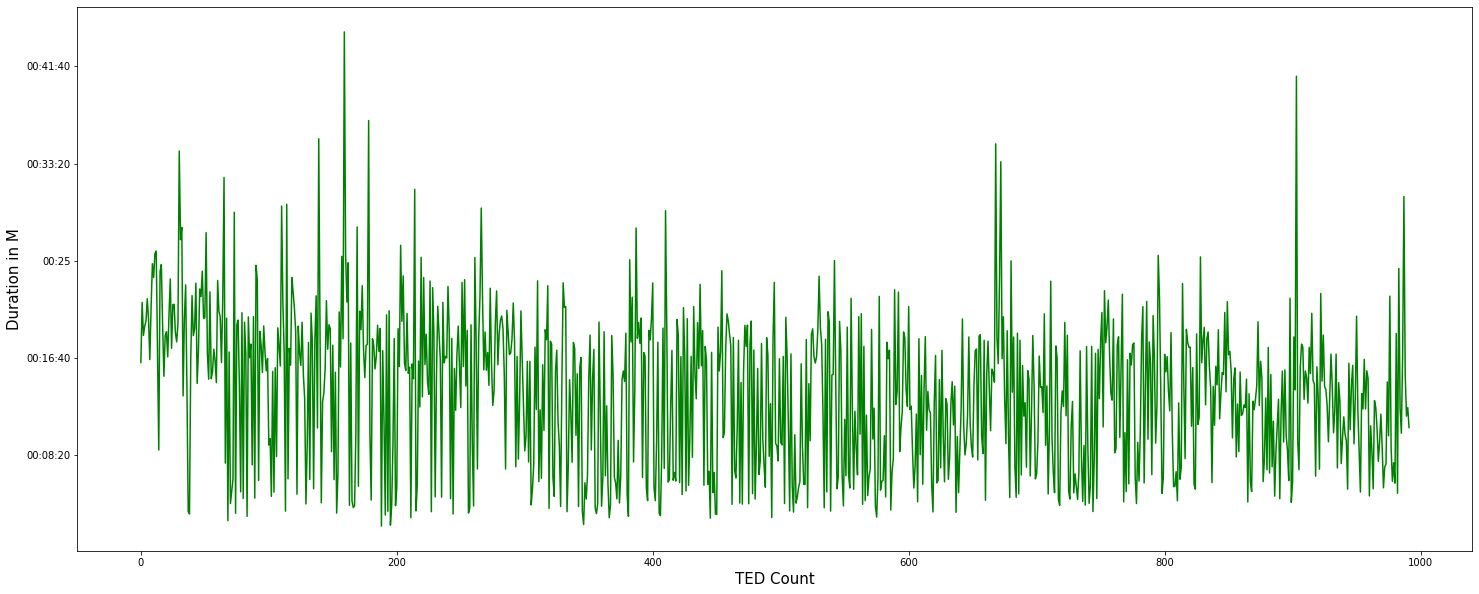

In [26]:
plt.figure(figsize=(25,10))
plt.plot(df['duration'], color = 'green')
plt.xlabel("TED Count", fontsize = 15)
plt.ylabel("Duration in M", fontsize = 15)
plt.show()

### Distibution of View of 992 Ted Talks

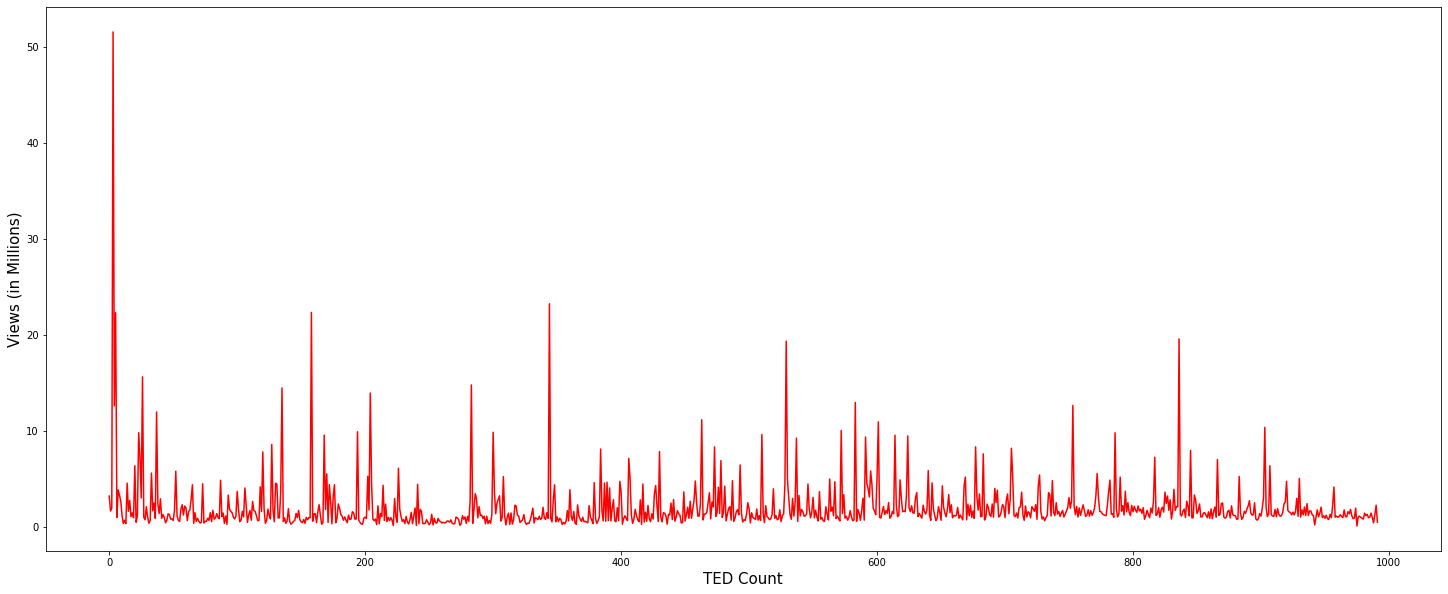

In [17]:
plt.figure(figsize=(25,10))
plt.plot((df['views']/1000000), color = 'red')
plt.xlabel("TED Count", fontsize = 15)
plt.ylabel("Views (in Millions)", fontsize = 15)
plt.show()

### TED Talks Delivered Per Year

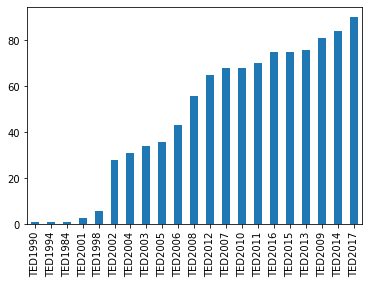

In [43]:
df.event.value_counts(sort = True, ascending=True).plot(kind = 'bar')